<a href="https://colab.research.google.com/github/romanowiczadam/data-sb/blob/master/kurs_datascience/04_podstawy_sklearn/09_svm_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# algorytm suport vector machine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sns.set()

In [0]:
# wczytanie danych

In [7]:
digits = datasets.load_digits()
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [8]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [15]:
images = digits.images
labels = digits.target
labels

array([0, 1, 2, ..., 8, 9, 8])

In [16]:
# wyswietlenie jednej grafki
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

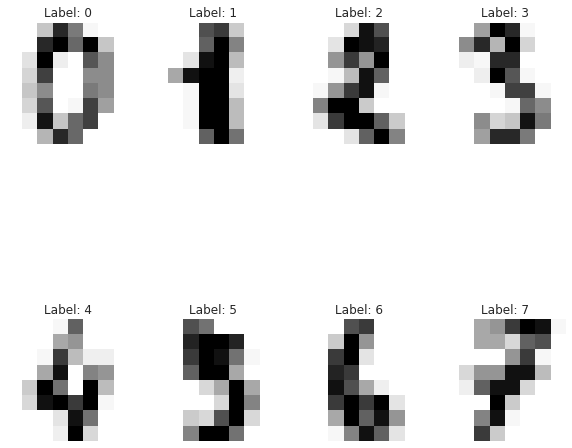

In [22]:

plt.figure(figsize=(10, 10))
for index, (image, label) in enumerate(list(zip(images, labels))[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title('Label: {}'.format(index, label))

In [29]:
# przyotowanie zbioru do uczenia

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train  = X_train.reshape(X_train.shape[0], -1)
X_test  = X_test.reshape(X_test.shape[0], -1)


print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (1347, 8, 8)
X_test shape: (450, 8, 8)
y_train shape: (1347,)
y_test shape: (450,)
X_train shape: (1347, 64)
X_test shape: (450, 64)


In [30]:
X_train[0]

array([ 0.,  0.,  3., 15., 16., 16., 12.,  0.,  0.,  0., 12., 12.,  7.,
       16.,  6.,  0.,  0.,  4., 12.,  0.,  9., 13.,  0.,  0.,  0.,  0.,
        1.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  8., 13., 16., 16.,  6.,
        0.,  0.,  0., 12., 15., 12.,  6.,  1.,  0.,  0.,  0.,  0., 15.,
        5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.])

In [31]:
y_train[0]

7

In [33]:
from sklearn.svm import SVC

classifier = SVC(gamma = 0.001)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
# ocena modelu
y_pred = classifier.predict(X_test)
y_pred

array([3, 4, 3, 6, 4, 7, 9, 7, 6, 1, 2, 4, 8, 8, 4, 8, 8, 5, 0, 1, 0, 1,
       7, 7, 1, 0, 2, 9, 2, 8, 4, 0, 3, 8, 1, 2, 3, 1, 7, 0, 3, 9, 6, 8,
       5, 2, 6, 7, 6, 9, 0, 8, 0, 5, 6, 9, 3, 3, 0, 9, 1, 2, 4, 2, 1, 2,
       0, 6, 4, 4, 2, 0, 6, 3, 6, 2, 4, 6, 9, 0, 7, 0, 6, 7, 9, 1, 6, 7,
       5, 3, 5, 7, 6, 5, 7, 0, 6, 7, 2, 0, 7, 5, 1, 3, 8, 6, 3, 7, 5, 0,
       9, 3, 9, 0, 2, 8, 4, 4, 1, 8, 1, 8, 2, 6, 0, 6, 1, 6, 4, 5, 4, 4,
       6, 2, 2, 1, 7, 0, 4, 7, 2, 4, 6, 3, 8, 6, 7, 7, 9, 0, 3, 8, 8, 1,
       4, 0, 2, 8, 7, 6, 2, 0, 0, 4, 8, 5, 7, 9, 2, 4, 7, 2, 6, 9, 7, 4,
       6, 4, 4, 2, 4, 1, 8, 3, 6, 1, 7, 6, 8, 8, 8, 5, 0, 8, 6, 5, 6, 7,
       2, 4, 3, 7, 6, 1, 1, 8, 0, 2, 2, 6, 6, 3, 2, 8, 8, 4, 5, 3, 6, 3,
       3, 1, 1, 2, 7, 4, 0, 0, 8, 1, 8, 2, 1, 2, 1, 3, 8, 5, 1, 8, 6, 3,
       3, 9, 0, 1, 6, 3, 8, 8, 7, 4, 8, 5, 0, 8, 3, 9, 3, 6, 3, 2, 1, 8,
       0, 6, 0, 6, 8, 5, 9, 3, 1, 4, 3, 3, 8, 9, 0, 6, 3, 4, 2, 7, 5, 8,
       1, 6, 6, 0, 0, 9, 9, 9, 8, 7, 9, 5, 4, 3, 5,

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       0.98      1.00      0.99        48
           2       1.00      1.00      1.00        45
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        45
           5       0.97      1.00      0.99        33
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        49
           8       1.00      0.98      0.99        53
           9       1.00      1.00      1.00        29

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



In [40]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 52,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 29]])

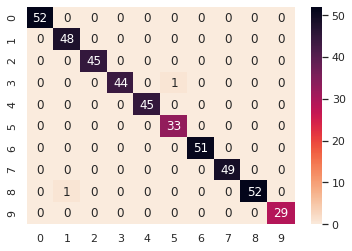

In [41]:
_ = sns.heatmap(cm, annot = True, cmap = sns.cm.rocket_r)

In [42]:
columns = ['pred_' + str(i) for i in range(10)]
index = ['true_' + str(i) for i in range(10)]

def plot_confusion_matrix(cm):
    # Mulitclass classification, 3 classes
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=columns, index=index[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=700, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [43]:
results = pd.DataFrame(data = {'y_pred': y_pred, 'y_test' : y_test})
results.head(10)

,y_pred,y_test
0,3,3
1,4,4
2,3,3
3,6,6
4,4,4
5,7,7
6,9,9
7,7,7
8,6,6
9,1,1


In [44]:
# maska pokazująca gdzie( w ktorych indexach) znajdują się błędne predykcje
errors = results[results['y_pred'] != results['y_test']]
errors_idxs = list(errors.index)
errors_idxs

[34, 53]

In [45]:
results.loc[errors_idxs, :]

,y_pred,y_test
34,1,8
53,5,3


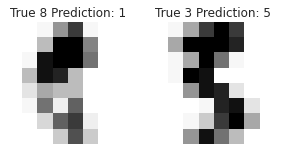

In [46]:
# wyswietlenie blednych obrazow
plt.figure(figsize=(10, 10))
for idx, error_idx in enumerate(errors_idxs[:4]):
    image = X_test[error_idx].reshape(8, 8)
    plt.subplot(2, 4, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title(f"True {results.loc[error_idx, 'y_test']} Prediction: {results.loc[error_idx, 'y_pred']}")